In [1]:
import subprocess

In [49]:
dir = '/home/parallels/vgdataset/ichijo/'
paths = {
    'C0002.MP4':'2022-11-19_12-06-41.json',\
    'C0003.MP4':'2022-11-19_12-07-39.json',\
    'C0003.MP4':'2022-11-19_12-08-20.json',\
    'C0005.MP4':'2022-11-19_12-09-49.json',\
    'C0006.MP4':'2022-11-19_12-11-55.json',\
    'C0007.MP4':'2022-11-19_12-12-44.json',\
    'C0008.MP4':'2022-11-19_12-13-59.json',\
    'C0009.MP4':'2022-11-19_12-16-07.json',\
    'C0013.MP4':'2022-11-19_12-19-15.json',\
    'C0014.MP4':'2022-11-19_12-26-42.json',\
    'C0015.MP4':'2022-11-19_12-41-19.json'}

In [50]:
def exec_vg(path,record):
    cmd = './pixelwise_stabilizer -i ' + path + ' -c ILCE-6500i -l SEL1670Z -j ' + record + ' -z 1.3 -n -a'
    # cmd = './pixelwise_stabilizer -i ' + path + ' -c ILCE-6500i -l SEL1670Z -j ./records/2022-10-04_12-56-14.json -z 1.3 -n -a'
    ### iPhoneのjsonをそのまま読めるように改変しないと！
    # cmd = './pixelwise_stabilizer -i /media/psf/Home/Dropbox/Mac/Documents/vgdataset/C0006.MP4 -c ILCE-6500i -l SEL1670Z -j ./records/2022-10-04_12-56-14.json -z 1.3 -n -a'

    res = None
    try:
        res = subprocess.check_call(cmd.split(),cwd="../build/")
    except:
        print("Error.")
    print(res)



In [51]:

from cProfile import label
import csv
import matplotlib.pyplot as plt

def openCSV(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)  # ヘッダー行を読み飛ばし

        data = []
        for row in reader:
            data.append(row)

    legends = [i for i in header]
    data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換

    # X軸に時間を、Y軸にデータをセット
    eavf = [row[legends.index('Estimated angular velocity frame')] for row in data]
    mavf = [row[legends.index('Measured angular velocity frame')] for row in data]
    a = [row[legends.index('a-skew')] for row in data]
    b = [row[legends.index('b-offset')] for row in data]
    return eavf,mavf,a,b

In [52]:
def plotSync(x,y,labelx,labely,title):
    plt.figure(figsize=(10,6))
    plt.plot(x,y,'bo-')
    plt.xlabel(labelx)
    plt.ylabel(labely)          
    # plt.legend()
    plt.title(title)
    plt.grid()    
    plt.show()

0
/home/parallels/vgdataset/ichijo/C0002.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-06-41.json


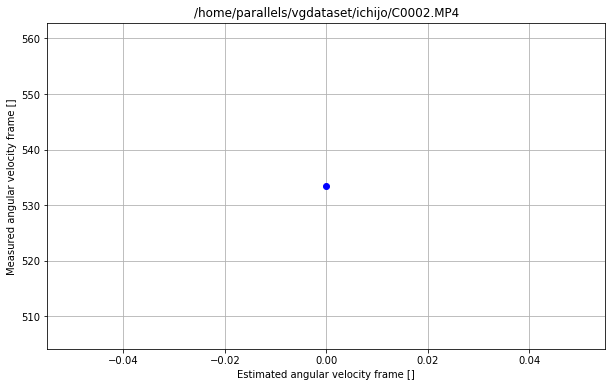

Error.
None
/home/parallels/vgdataset/ichijo/C0003.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-08-20.json


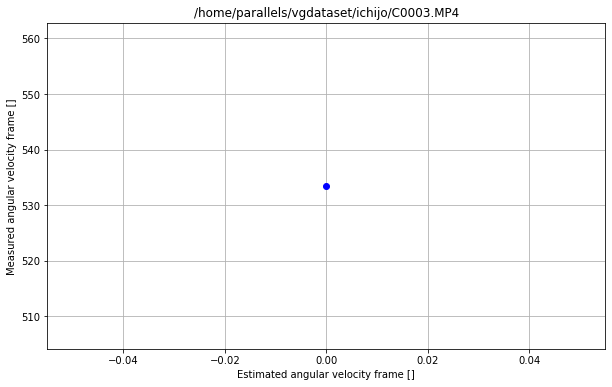

0
/home/parallels/vgdataset/ichijo/C0005.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-09-49.json


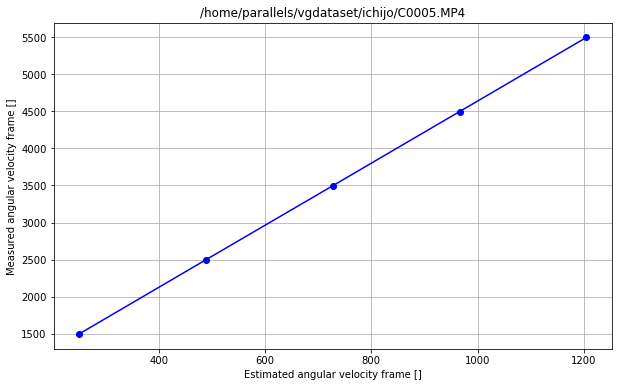

0
/home/parallels/vgdataset/ichijo/C0006.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-11-55.json


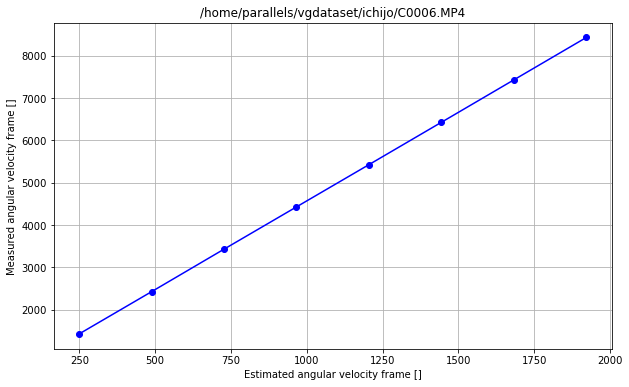

0
/home/parallels/vgdataset/ichijo/C0007.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-12-44.json


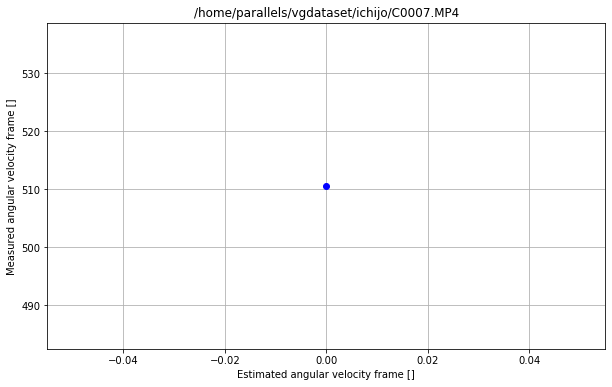

0
/home/parallels/vgdataset/ichijo/C0008.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-13-59.json


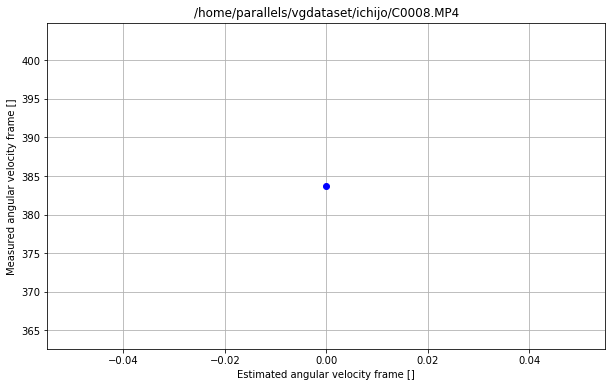

0
/home/parallels/vgdataset/ichijo/C0009.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-16-07.json


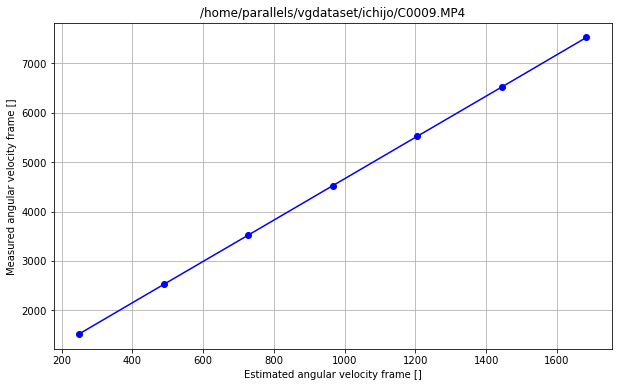

0
/home/parallels/vgdataset/ichijo/C0013.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-19-15.json


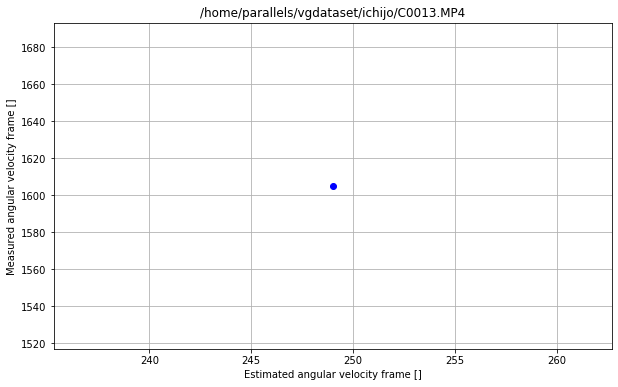

0
/home/parallels/vgdataset/ichijo/C0014.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-26-42.json


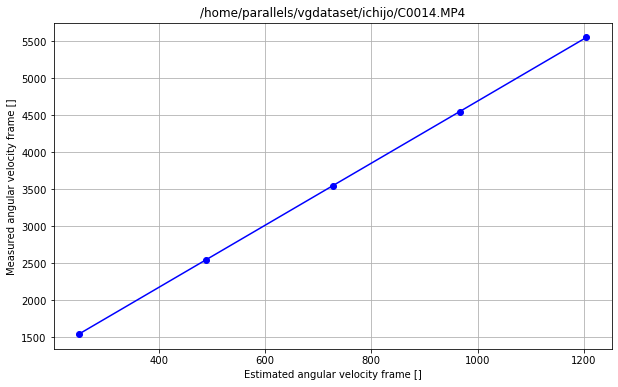

0
/home/parallels/vgdataset/ichijo/C0015.MP4 /home/parallels/vgdataset/ichijo/2022-11-19_12-41-19.json


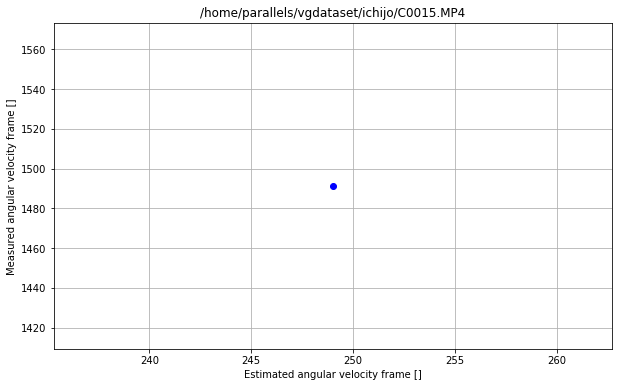

In [53]:
for p, r in paths.items():
    exec_vg(dir+p,dir+r)
    print(dir+p,dir+r)
    eavf,mavf,a,b = openCSV('../build/latest_sync_table.csv')
    plotSync(eavf,mavf,'Estimated angular velocity frame []','Measured angular velocity frame []',dir+p)
    

パラメータを変えないとsyncきついな  
このデータを取得したときのものは以下  
manager.getSyncTable(10.0,499);